In [1]:
# ----------------------------------PART 2 - flair ---------------------------------------------------

In [1]:
# Data processing
import pandas as pd

# Hugging Face model
from transformers import pipeline

# Import flair pre-trained sentiment model
from flair.models import TextClassifier
fl_classifier = TextClassifier.load('en-sentiment')

# Import flair Sentence to process input text
from flair.data import Sentence

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

2023-01-20 15:34:29,691 loading file C:\Users\Leon\.flair\models\sentiment-en-mix-distillbert_4.pt


In [5]:
# Define a function to get Flair sentiment prediction score
def score_flair(text):
  # Flair tokenization
  sentence = Sentence(text)
  # Predict sentiment
  fl_classifier.predict(sentence)
  # Extract the score
  score = sentence.labels[0].score
  # Extract the predicted label
  value = sentence.labels[0].value
  # Return the score and the predicted label
  return score, value

In [6]:
score_flair("scam")

(0.9995369911193848, 'NEGATIVE')

In [9]:
score_flair("computer")

(0.8993498086929321, 'POSITIVE')

The output you are getting, (0.8993498086929321, 'POSITIVE'), suggests that the model is assigning a positive sentiment score of 0.8993498086929321 to the word "computer". However, it is not always the case that a text with a positive score is necessarily positive, it can be positive in some cases and neutral in other cases depending on the context of the text.

It's possible that the model was trained on a dataset that included a variety of texts that contained the word "computer" in a positive context. For example, in a sentence like "I just got a new computer and I love it!", the word "computer" is in a positive context.

In [11]:
score_flair("It's too good to be true")

(0.9945777654647827, 'POSITIVE')

After the function is defined, we can apply the function to each review in the dataset and create the predicted sentiments.

In [40]:
import pandas as pd
# Load the Sentiment140 dataset as a data frame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin1', names=['polarity', 'id', 'date', 'query', 'user', 'text'])
# Print the first 5 rows of the data frame
print(f"\n The shape data is:{df.shape}")


 The shape data is:(1600000, 6)


At first I will make sentiment analysis on data without preprocessing the text.

In [16]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
data = df
part_of_data = data[1:10000]

In [25]:
!pip install tqdm

In [26]:
from tqdm import tqdm
tqdm.pandas()
#Get sentiment score for each review. This gives us a score, bu I want only if it's positive or negative. 
# part_of_data['scores_flair'] = part_of_data['text'].apply(lambda s: score_flair(s)[0])
# So will take [1] in order to predict sentiment label for each review
part_of_data['scores_flair'] = part_of_data['text'].progress_apply(lambda s: score_flair(s)[1])

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [01:05<00:00, 152.33it/s]
C:\Users\Leon\AppData\Local\Temp\ipykernel_30116\3163813396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_of_data['scores_flair'] = part_of_data['text'].progress_apply(lambda s: score_flair(s)[1])


In [27]:
# Check the distribution of the score
part_of_data['scores_flair'].describe()

count         9999
unique           2
top       NEGATIVE
freq          7192
Name: scores_flair, dtype: object

Let's try to do this on all the data, it will take about ~ 3 hours. 

In [90]:
data['scores_flair'] = data['text'].progress_apply(lambda s: score_flair(s)[1])

100%|█████████████████████████████████████████████████████████████████████| 1600000/1600000 [2:55:55<00:00, 151.58it/s]


In [91]:
data['scores_flair'].value_counts()

NEGATIVE    808247
POSITIVE    791753
Name: scores_flair, dtype: int64

In [92]:
copy_data = data.copy()

In [93]:
type(copy_data['polarity'][1599999])

numpy.int64

In [94]:
copy_data

,polarity,id,date,query,user,text,scores_flair
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NEGATIVE
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NEGATIVE
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,NEGATIVE
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NEGATIVE
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",NEGATIVE
...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,POSITIVE
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,POSITIVE
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,POSITIVE
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,POSITIVE


In [95]:
copy_data['polarity'] = copy_data['polarity'].apply(lambda x: 1 if x == copy_data['polarity'][1599999] else 0)
copy_data['scores_flair'] = copy_data['scores_flair'].apply(lambda x: 1 if x == copy_data['scores_flair'][1599999] else 0)

In [96]:
copy_data

,polarity,id,date,query,user,text,scores_flair
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1


In [97]:
from sklearn import metrics
from tqdm import tqdm

y_true = copy_data['polarity']

# Get the predicted labels
y_pred = copy_data['scores_flair']
# Calculate the accuracy
# accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label=1)
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label=1)
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label=1)
auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.700020625
Precision: 0.702104065282986
Recall: 0.69486625
F1 score: 0.6984664077906559
AUC score: 0.700020625
Confusion Matrix [[564140 235860]
 [244107 555893]]


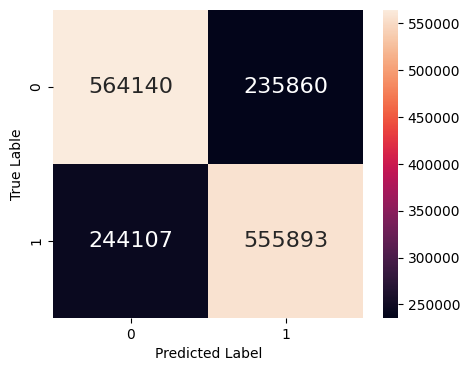

In [100]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

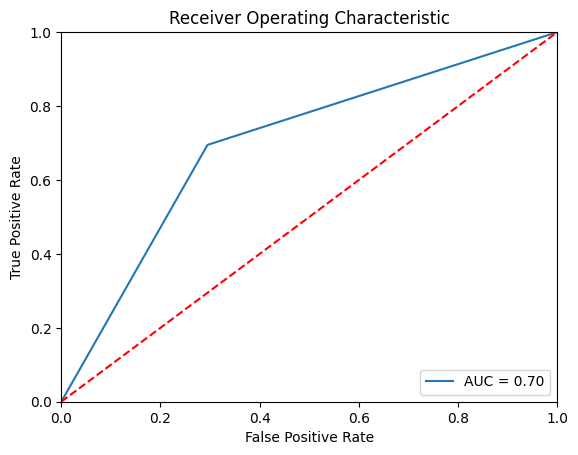

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

Let's use Flair on another set of data:

In [107]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
another_data_set = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
another_data_set.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [108]:
another_data_set['scores_flair'] = another_data_set['text'].progress_apply(lambda s: score_flair(s)[1])

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:39<00:00, 146.87it/s]


In [109]:
another_data_set_copy = another_data_set.copy()

In [110]:
another_data_set_copy["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [111]:
another_data_set_copy = another_data_set_copy[another_data_set_copy['airline_sentiment'] != 'neutral']

In [112]:
another_data_set_copy["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [113]:
another_data_set_copy["scores_flair"].value_counts()

NEGATIVE    8379
POSITIVE    3162
Name: scores_flair, dtype: int64

In [114]:
another_data_set_copy

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_flair
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NEGATIVE
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NEGATIVE
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NEGATIVE
5,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NEGATIVE
6,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
14633,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NEGATIVE
14634,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NEGATIVE
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NEGATIVE
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NEGATIVE


In [122]:
another_data_set_copy['airline_sentiment'] = another_data_set_copy['airline_sentiment'].apply(lambda x: 1 if x == another_data_set_copy['airline_sentiment'][1] else 0)
another_data_set_copy['scores_flair'] = another_data_set_copy['scores_flair'].apply(lambda x: 1 if x == another_data_set_copy['scores_flair'][6] else 0)

In [123]:
another_data_set_copy

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_flair
1,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,0
3,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,0
4,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,0
5,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,0
6,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",1
...,...,...,...,...,...,...,...,...,...,...,...
14633,0,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,0
14634,0,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,0
14635,1,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,0
14636,0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,0


In [124]:
y_true = another_data_set_copy['airline_sentiment']

# Get the predicted labels
y_pred = another_data_set_copy['scores_flair']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label=1)
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label=1)
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label=1)
auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.8680356988129279
Precision: 0.6328273244781784
Recall: 0.8468049090139653
F1 score: 0.7243438914027149
AUC score: 0.8601533806346793
Confusion Matrix [[8017 1161]
 [ 362 2001]]


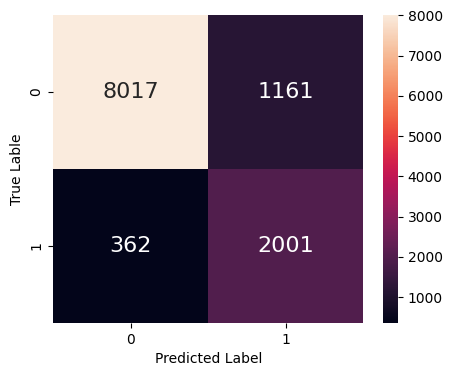

In [125]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

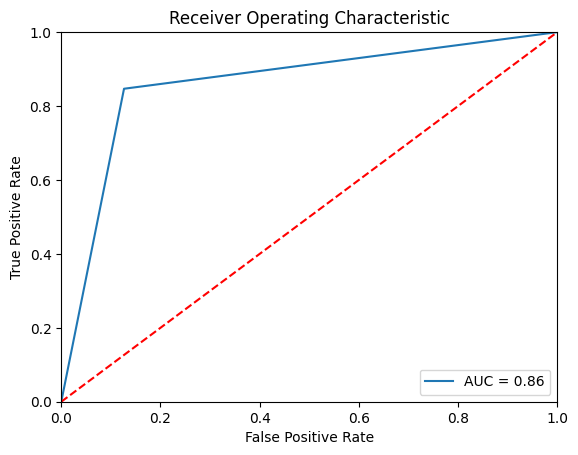

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()